In [1]:
#Impoerting the packages
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [15]:
#Loading the Data
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(directory='C:/Users/simra/Desktop/seg_train/seg_train',target_size=(50,50),shuffle=True)
test_dataset = test.flow_from_directory(directory='C:/Users/simra/Desktop/seg_test/seg_test',target_size=(50,50),shuffle=True)

Found 14032 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


[24, 14, 31, 12, 28, 27, 13, 1, 5, 16]


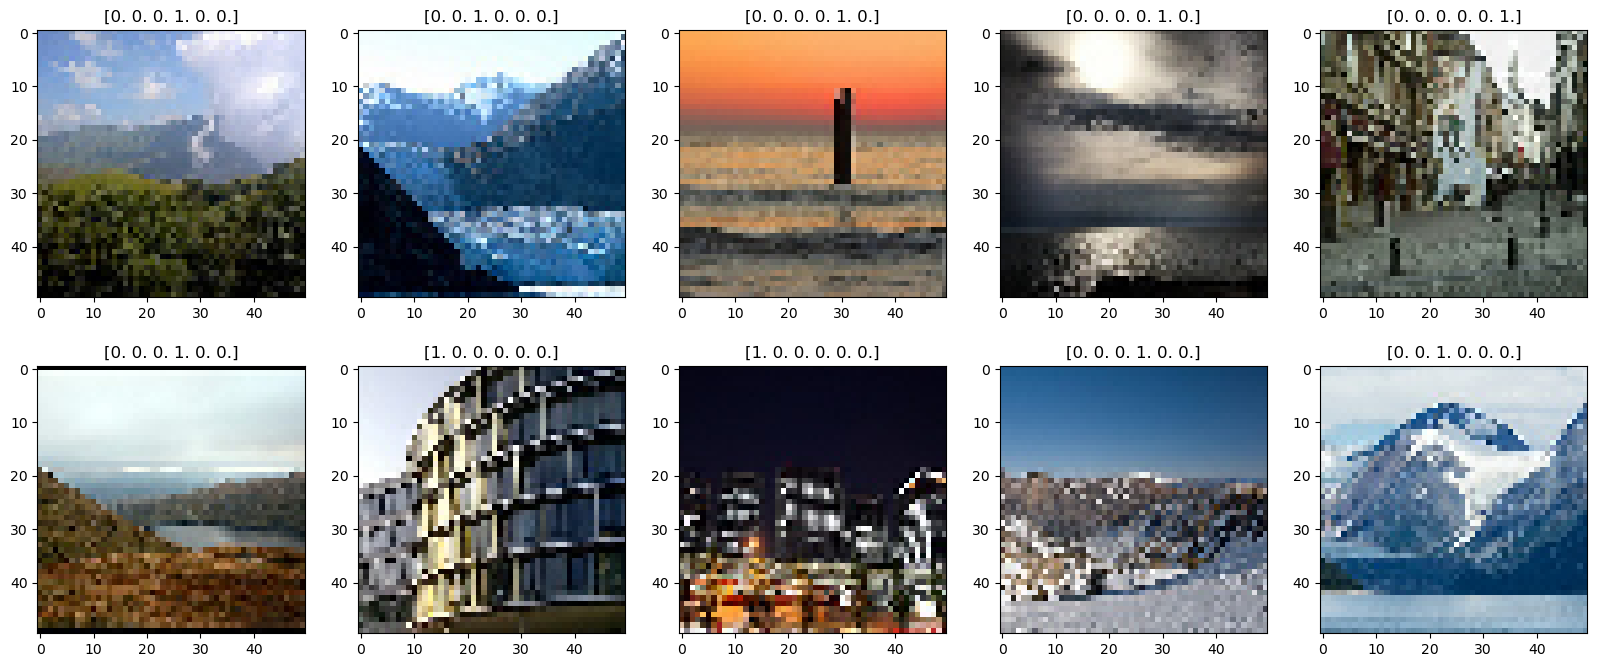

In [17]:
indices = [np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()

In [18]:
#Visualization of Data
values = list(train_dataset.class_indices.values())
keys = list(train_dataset.class_indices.keys())

dics = list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)
mappings
#print(values)
#print(keys)
#print(dics)

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [19]:
#Creating the Model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
kernel_regularizer = keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 50, 50, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 dropout_8 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 activation_13 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

In [24]:
model.compile(loss='CategoricalCrossentropy',optimizer = 'adam',metrics='accuracy')
history = model.fit(train_dataset,batch_size=80,epochs=5,validation_data=test_dataset)

Epoch 1/5
439/439 [==============================] - 78s 174ms/step - loss: 0.3751 - accuracy: 0.8746 - val_loss: 0.5253 - val_accuracy: 0.8190
Epoch 2/5
439/439 [==============================] - 86s 197ms/step - loss: 0.3526 - accuracy: 0.8785 - val_loss: 0.6114 - val_accuracy: 0.7917
Epoch 3/5
439/439 [==============================] - 88s 200ms/step - loss: 0.3278 - accuracy: 0.8931 - val_loss: 0.5852 - val_accuracy: 0.8047
Epoch 4/5
439/439 [==============================] - 92s 209ms/step - loss: 0.3209 - accuracy: 0.8915 - val_loss: 0.5156 - val_accuracy: 0.8210
Epoch 5/5
439/439 [==============================] - 99s 225ms/step - loss: 0.3009 - accuracy: 0.9010 - val_loss: 0.5670 - val_accuracy: 0.8177


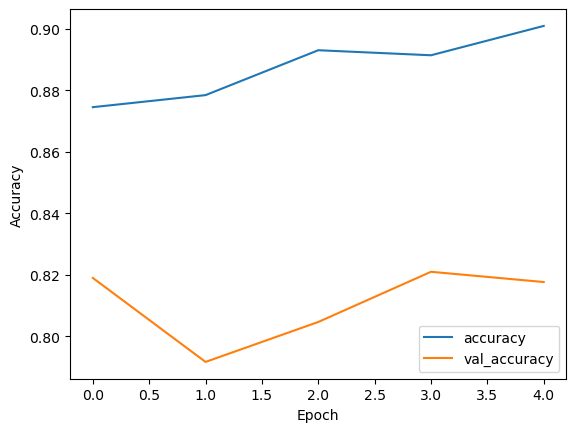

In [25]:
#Plotting Accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')